# What is Softmax and Temperature

The softmax function is commonly used in machine learning, especially in classification tasks. It transforms logits (raw predictions) into probabilities. Mathematically, the softmax function is defined as:

$$
\text{softmax}(z_i) = \frac{e^{z_i / T}}{\sum_{j} e^{z_j / T}}
$$

Here:

1. $z_i$ represents the $i^{\text{th}}$ logit.
2. $T$ is the temperature parameter.

## Explanation of Temperature

The temperature parameter $T$ controls the smoothness of the probability distribution:

1. When $T \to 0$, the distribution becomes more "peaky," assigning higher probability to the largest logit.
2. When $T \to \infty$, the distribution becomes more uniform.

This flexibility makes temperature a powerful tool for

## Controlling Randomness in Predictions with Temperature

The temperature parameter $T$ plays a critical role in modulating the randomness of predictions generated by the softmax function. By adjusting $T$, you can control the level of exploration versus exploitation in probabilistic outputs.

$$
\text{softmax}(z_i) = \frac{e^{z_i / T}}{\sum_{j} e^{z_j / T}}
$$

### Effects of Temperature on Randomness

1. **Low Temperature ($T \to 0$):**
   - Predictions become deterministic.
   - The largest logit dominates the output probabilities, as smaller logits are effectively suppressed by the exponential scaling.
   - This results in less diversity in predictions, favoring exploitation of the most confident option.

2. **High Temperature ($T \to \infty$):**
   - Predictions become more random.
   - All logits contribute almost equally to the probabilities, as the scaling effect diminishes.
   - This increases diversity, encouraging exploration across multiple options. (more noise)

### Practical Applications of Temperature

1. **Sampling from Language Models:**
   - Lower $T$ leads to more deterministic and coherent text, often used for tasks requiring accuracy and focus.
   - Higher $T$ generates diverse and creative text, ideal for brainstorming or entertainment.

2. **Reinforcement Learning:**
   - High $T$ promotes exploration of less likely actions to discover novel strategies.
   - Low $T$ enforces exploitation of known optimal actions for consistency.

3. **Uncertainty Quantification:**
   - By varying $T$, you can assess how sensitive predictions are to small changes in input, helping to measure uncertainty in model outputs.

3. **Contrastive Learning:**
   - Higher t: By making the probability distribution more uniform, you're effectively reducing the influence of the input scores zi on the output probabilities. This can be interpreted as adding "noise" to the system because the selection becomes less dependent on the actual values of zi and more random.


In [3]:
import numpy as np
import matplotlib.pyplot as plt


def softmax(z):
    """
    input: [1, 22, 10]
    output: [e^1 / e^1 + e^22 + e^10, e^1 / e^22 + e^22 + e^10, e^10 / e^1 + e^22 + e^10]
    """
    return np.exp(z) / np.sum(np.exp(z))


softmax([1, 22, 10])

array([7.58251383e-10, 9.99993855e-01, 6.14417460e-06])

In [4]:
import numpy as np

def softmax(z, t):
    """
    input: [1, 22, 10]
    output: [e^1 / e^1 + e^22 + e^10, e^1 / e^22 + e^22 + e^10, e^10 / e^1 + e^22 + e^10]
    """
    z = np.array(z)
    num = np.exp(z/t)
    dem = np.sum(np.exp(z/t))
    return num / dem


softmax([1, 22, 10], t=10000)

array([0.33300004, 0.33370008, 0.33329988])

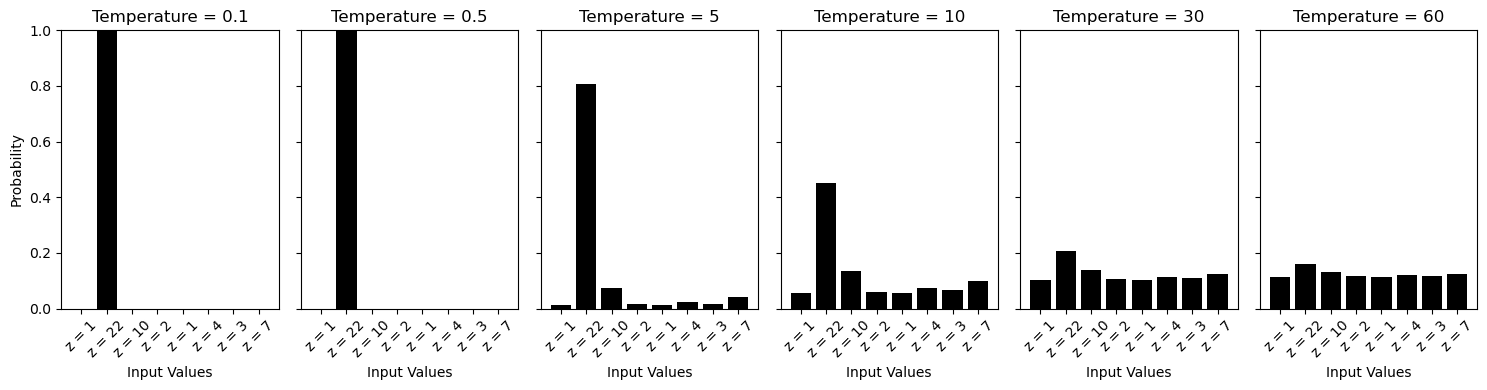

In [17]:
def plot_softmax_with_t():
    t_values = [0.1, 0.5, 5, 10, 30, 60]

    z = [1, 22, 10, 2, 1, 4, 3, 7]
    temps = len(t_values)

    probabilities = [softmax(z, t) for t in t_values]


    fig, axes = plt.subplots(1, temps, figsize=(15, 4), sharey=True)

    for idx, t in enumerate(t_values):
        ax = axes[idx]
        probs = probabilities[idx]
        ax.bar(range(len(z)), probs, color='black')
        ax.set_title(f'Temperature = {t}')
        ax.set_xticks(range(len(z)))
        ax.set_xticklabels([f'z = {val}' for val in z], rotation=45)
        ax.set_ylim(0, 1)
        ax.set_ylabel('Probability' if idx == 0 else '')
        ax.set_xlabel('Input Values')

    plt.tight_layout()
    plt.show()

plot_softmax_with_t()


# Gradient of Softmax: Step-by-Step Derivation

The softmax function is defined as:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}.
$$

Let $s_i = \text{softmax}(z_i)$. To compute the gradient $\frac{\partial s_i}{\partial z_k}$, we proceed step-by-step.

## Step 1: Write the softmax function explicitly

$$
s_i = \frac{e^{z_i}}{\sum_{j} e^{z_j}}.
$$

## Step 2: Differentiate the numerator and denominator

Using the quotient rule for derivatives:

$$
\frac{\partial s_i}{\partial z_k} = \frac{\frac{\partial}{\partial z_k} \left( e^{z_i} \right) \cdot \left( \sum_{j} e^{z_j} \right) - e^{z_i} \cdot \frac{\partial}{\partial z_k} \left( \sum_{j} e^{z_j} \right)}{\left( \sum_{j} e^{z_j} \right)^2}.
$$

## Step 3: Compute the derivatives

1. If $k = i$, $\frac{\partial e^{z_i}}{\partial z_k} = e^{z_i}$.
2. If $k \neq i$, $\frac{\partial e^{z_i}}{\partial z_k} = 0$.
3. For the denominator, $\frac{\partial}{\partial z_k} \left( \sum_{j} e^{z_j} \right) = e^{z_k}$.

Substitute these into the equation:

$$
\frac{\partial s_i}{\partial z_k} = \frac{e^{z_i} \cdot \left( \sum_{j} e^{z_j} \right) - e^{z_i} \cdot e^{z_k}}{\left( \sum_{j} e^{z_j} \right)^2}.
$$

## Step 4: Simplify the expression

Factor out $e^{z_i}$ and simplify:

$$
\frac{\partial s_i}{\partial z_k} = \frac{e^{z_i}}{\sum_{j} e^{z_j}} \cdot \left( \delta_{ik} - \frac{e^{z_k}}{\sum_{j} e^{z_j}} \right),
$$

where $\delta_{ik}$ is the Kronecker delta, equal to 1 if $i = k$ and 0 otherwise.

## Step 5: Express in terms of softmax

Recognizing that $s_i = \frac{e^{z_i}}{\sum_{j} e^{z_j}}$ and $s_k = \frac{e^{z_k}}{\sum_{j} e^{z_j}}$, we rewrite:

$$
\frac{\partial s_i}{\partial z_k} = s_i \cdot (\delta_{ik} - s_k).
$$

## Final Result

The gradient of the softmax function with respect to its inputs is:

$$
\frac{\partial s_i}{\partial z_k} =
\begin{cases}
s_i \cdot (1 - s_i), & \text{if } i = k, \\
-s_i \cdot s_k, & \text{if } i \neq k.
\end{cases}
$$



$$
\frac{\partial s_i}{\partial z_k} =
\begin{cases}
softmax(x_i) \cdot (1 - softmax(xi)), & \text{if } i = k, \\
-softmax(x_i) \cdot s_k, & \text{if } i \neq k.
\end{cases}
$$




## 1. Softmax is considered an activation function, but it has some special characteristics:

### a. It's typically used as the final layer activation function in classification tasks

_Correct._

Softmax is predominantly used in the output layer of neural networks, especially for $ \text{multi-class classification} $ problems. Its primary role here is to convert the raw output logits into a probability distribution over the predicted classes, enabling the model to make interpretable predictions.

### b. Unlike other activation functions, softmax operates on all outputs simultaneously to produce a probability distribution that sums to 1

_Correct._

Unlike activation functions like ReLU or Sigmoid, which operate individually on each neuron’s output, softmax is a vectorized function. It takes the entire vector of logits and normalizes them into a probability distribution where:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} \quad \text{for } i = 1, 2, \dots, K
$$

This ensures that:

$$
0 < \text{softmax}(z_i) < 1
$$

and

$$
\sum_{i=1}^{K} \text{softmax}(z_i) = 1
$$

This collective operation ensures that the outputs can be interpreted as probabilities, which is essential for tasks like classification.